In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

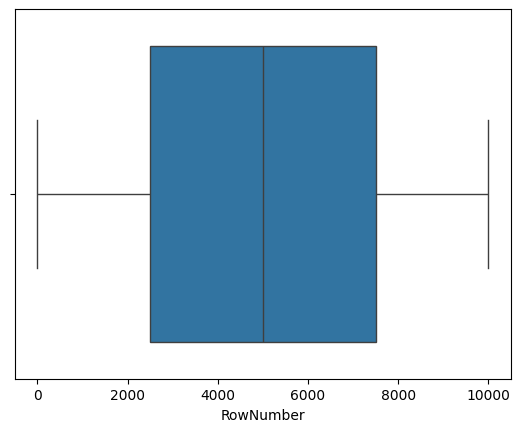

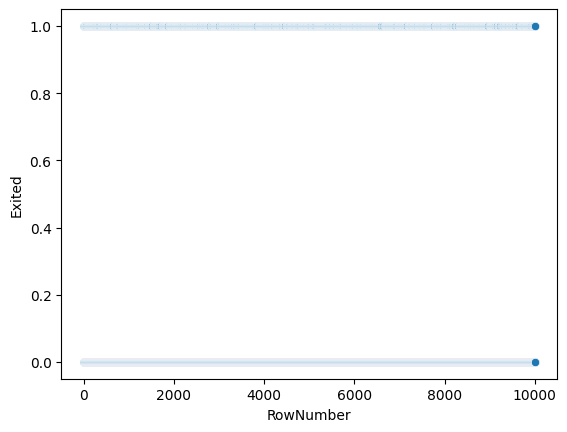

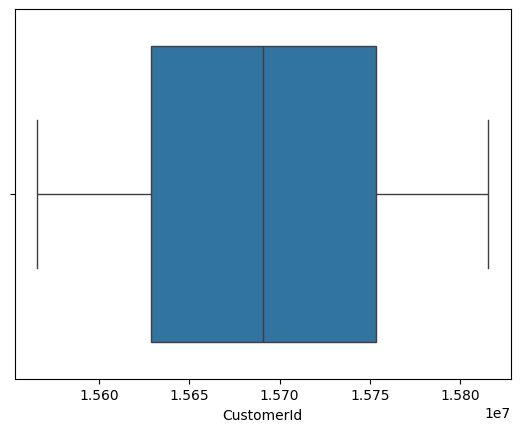

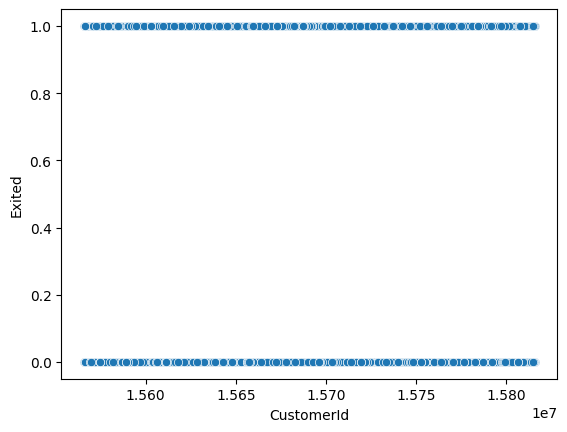

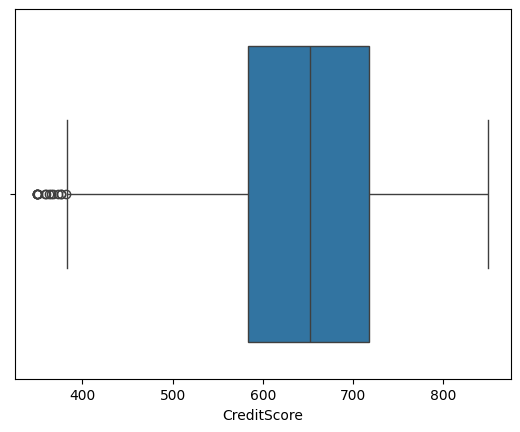

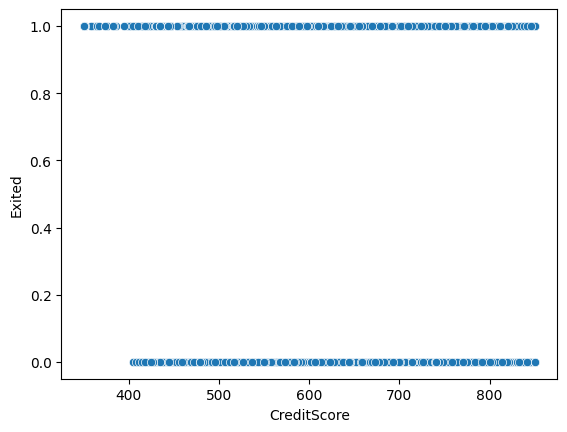

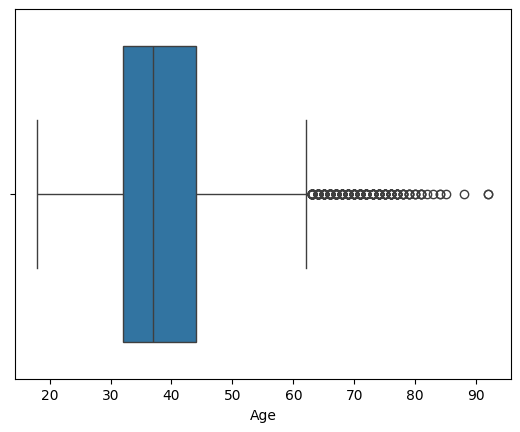

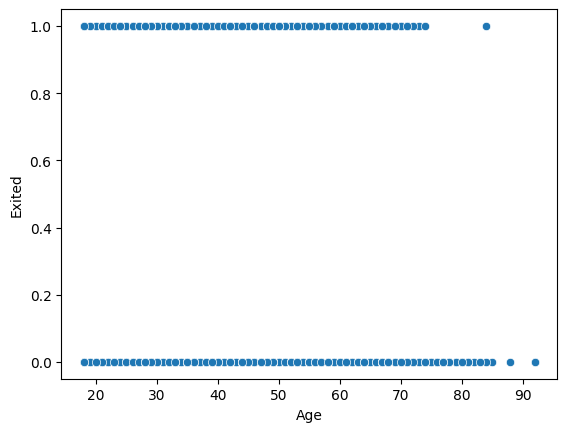

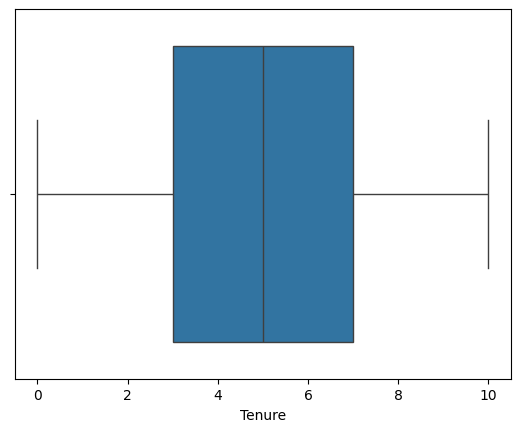

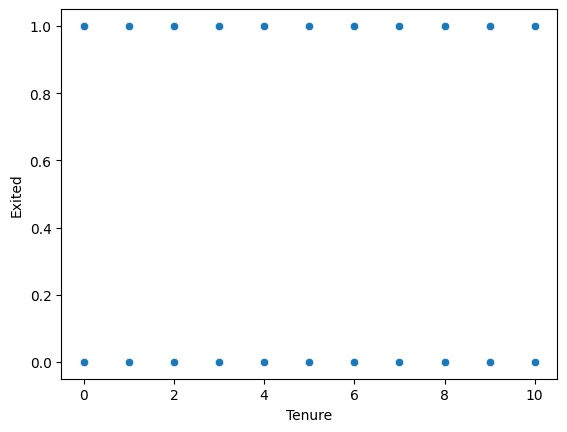

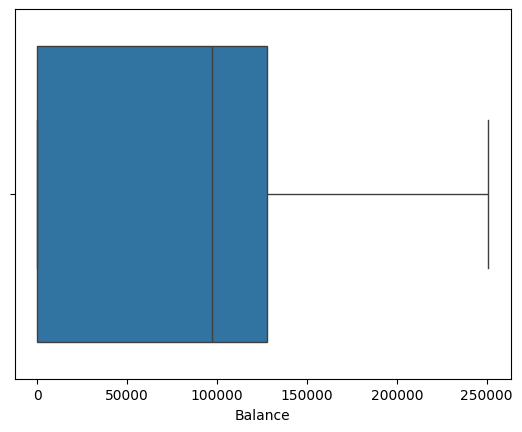

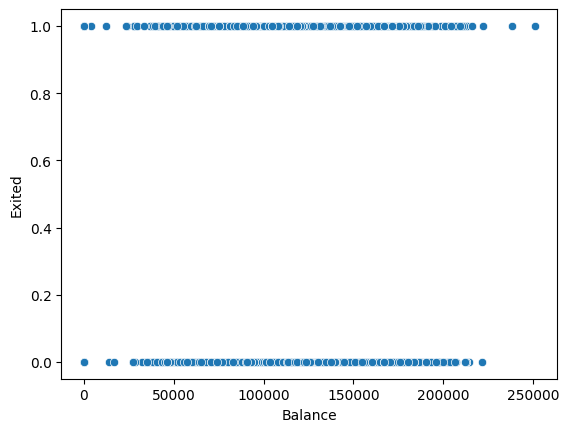

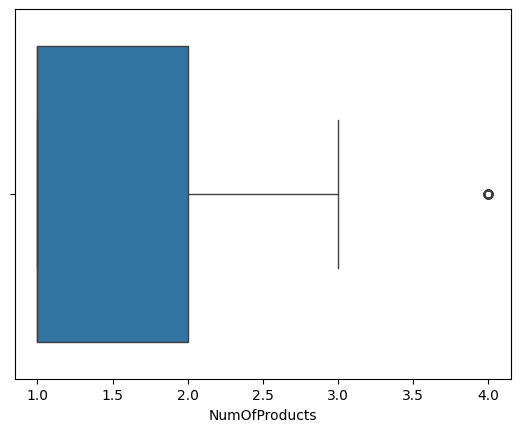

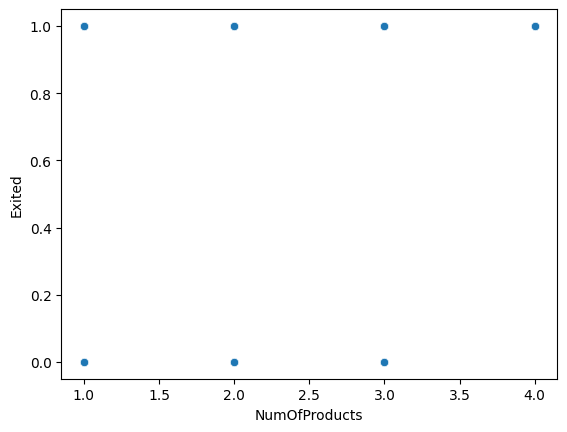

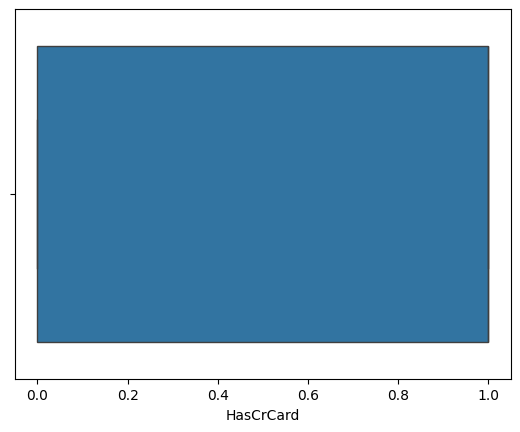

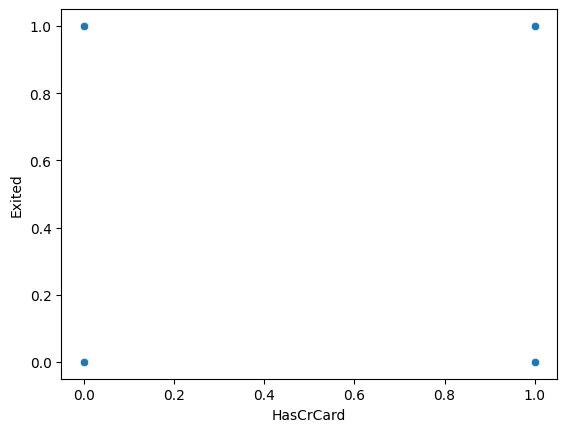

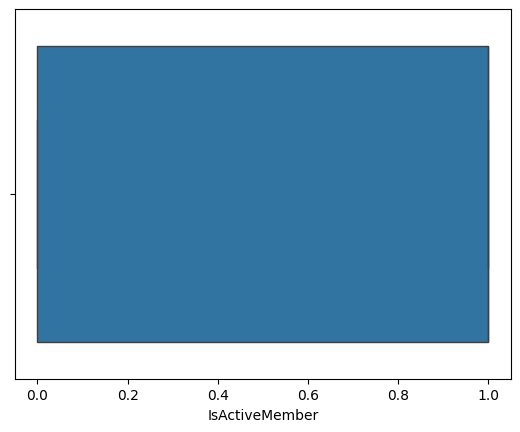

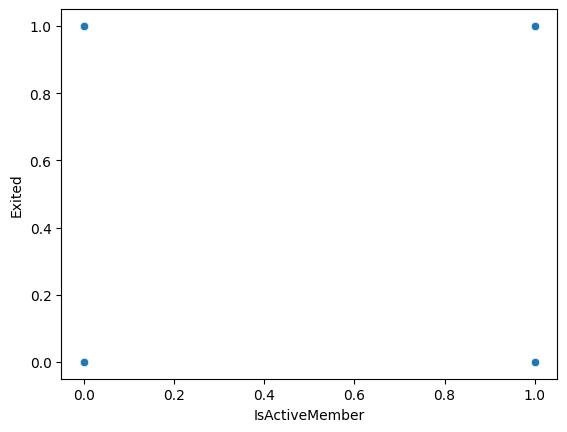

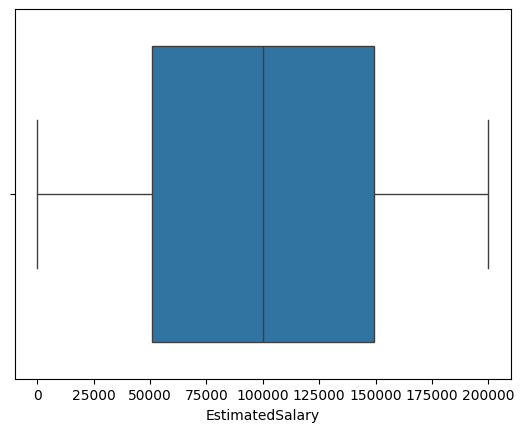

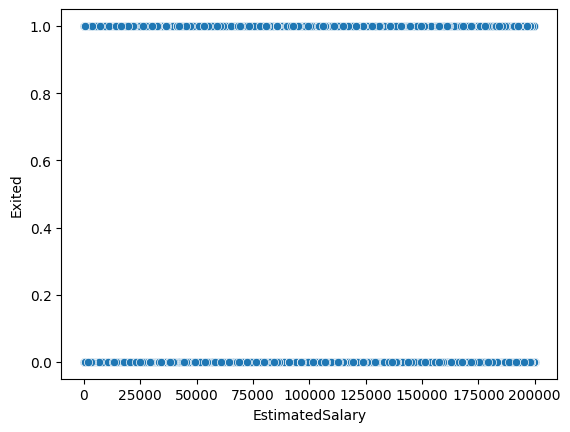

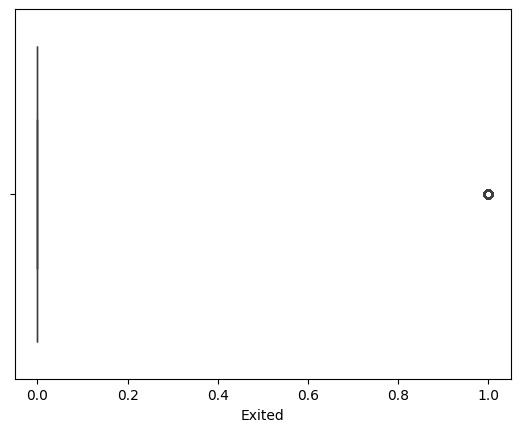

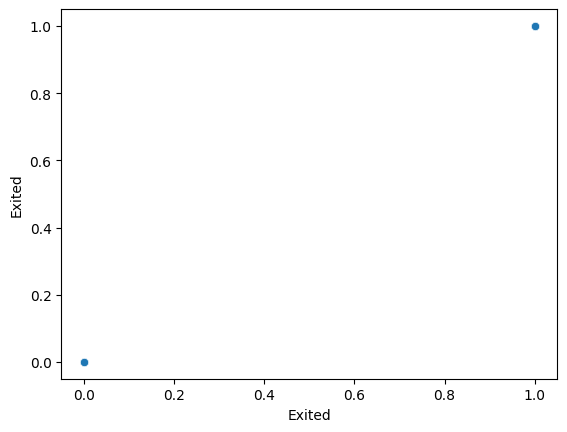

In [5]:
for col in data.columns:
    if data[col].dtype != 'object':
        bp = sns.boxplot(data = data, x = col)
        plt.show()
        sp = sns.scatterplot(data = data, x = col, y=data["Exited"])
        plt.show()

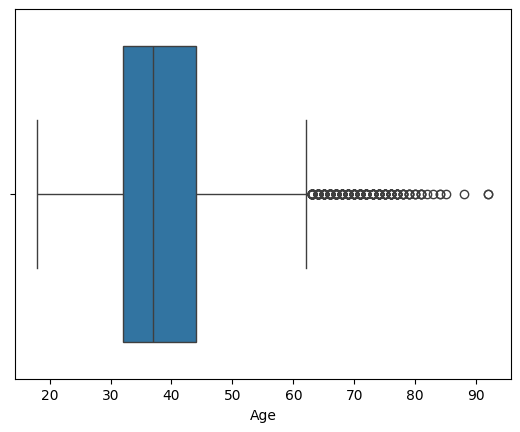

In [6]:
bp = sns.boxplot(data = data, x = 'Age')
plt.show()

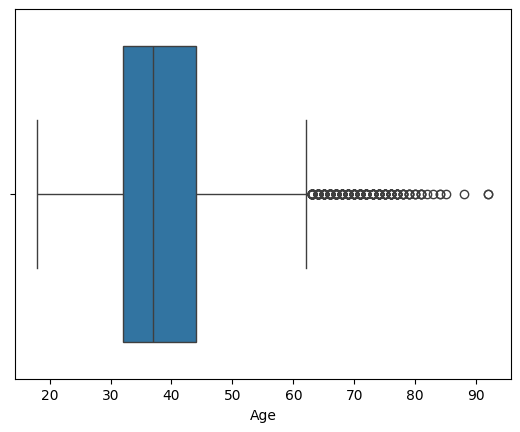

In [7]:
bp = sns.boxplot(data = data, x = 'Age')
plt.show()

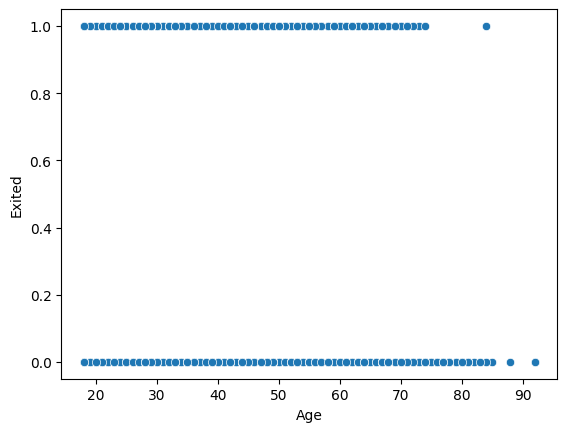

In [8]:
sp = sns.scatterplot(data = data, x = 'Age', y=data["Exited"])
plt.show()

In [9]:
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
data.drop(data[data['Age']>83].index, axis = 0, inplace =True)


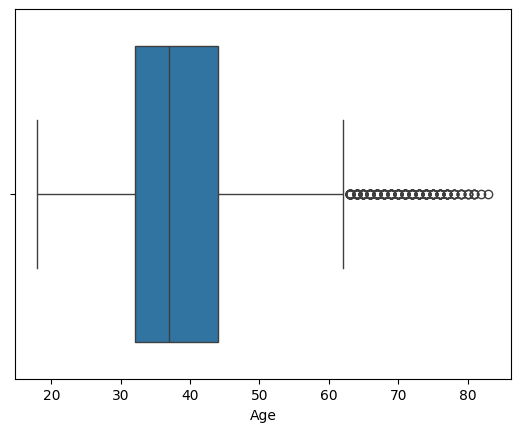

In [10]:
bp = sns.boxplot(data = data, x = 'Age')
plt.show()



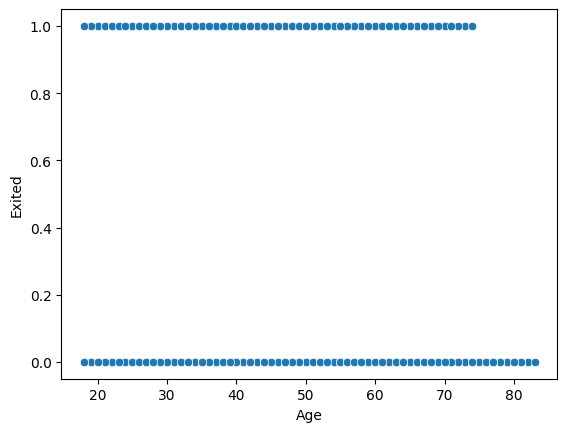

In [11]:
sp = sns.scatterplot(data = data, x = 'Age', y=data["Exited"])
plt.show()

In [12]:

data.shape

(9994, 14)

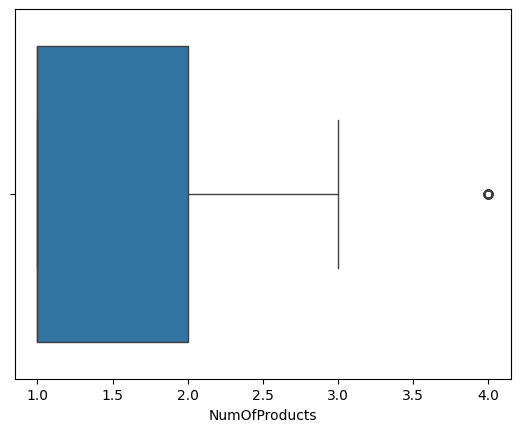

In [13]:
bp = sns.boxplot(data = data, x = 'NumOfProducts')
plt.show()

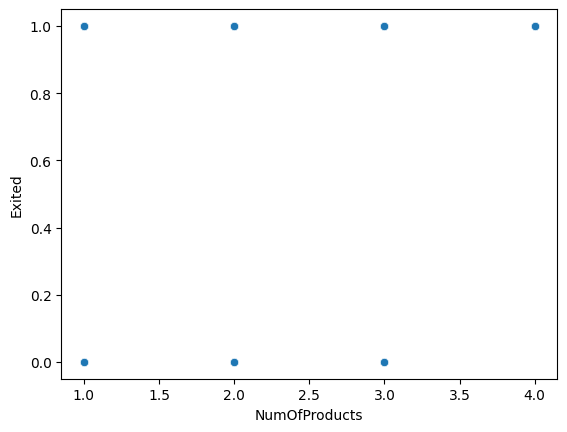

In [14]:
sp = sns.scatterplot(data = data, x = 'NumOfProducts', y=data["Exited"])
plt.show()

In [15]:
data.drop(data[data['NumOfProducts']>=4].index, axis = 0, inplace =True)

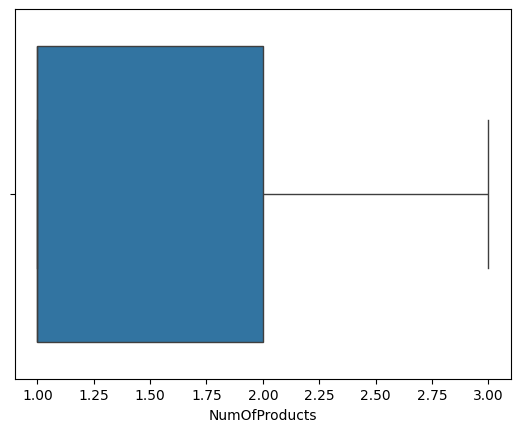

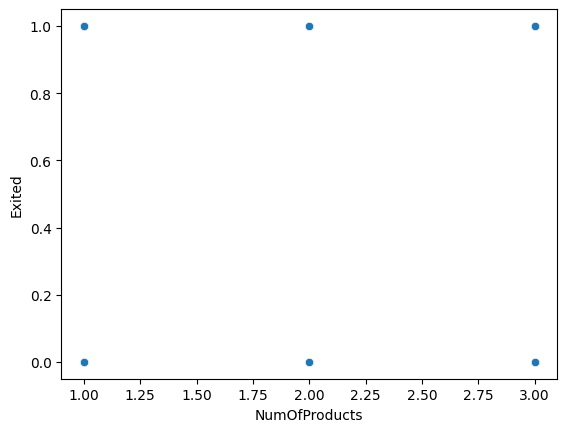

In [16]:
bp = sns.boxplot(data = data, x = 'NumOfProducts')
plt.show()
sp = sns.scatterplot(data = data, x = 'NumOfProducts', y=data["Exited"])
plt.show()

In [17]:
data.shape

(9934, 14)

<Axes: xlabel='Exited', ylabel='count'>

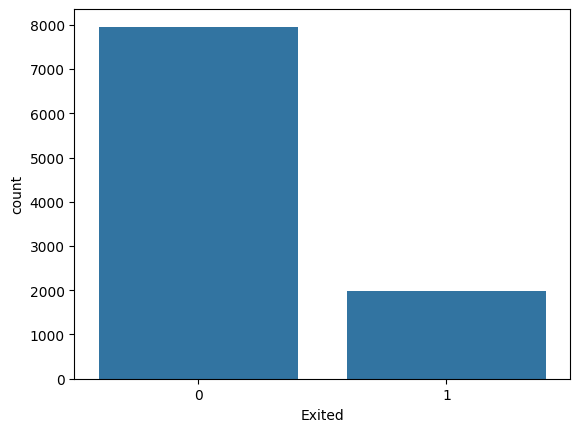

In [18]:
sns.countplot(x="Exited", data=data)

In [19]:
geography = pd.get_dummies(data['Geography'], drop_first=True)
gender = pd.get_dummies(data['Gender'], drop_first=True)

In [20]:

data = pd.concat([data, geography, gender], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9934 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9934 non-null   int64  
 1   CustomerId       9934 non-null   int64  
 2   Surname          9934 non-null   object 
 3   CreditScore      9934 non-null   int64  
 4   Geography        9934 non-null   object 
 5   Gender           9934 non-null   object 
 6   Age              9934 non-null   int64  
 7   Tenure           9934 non-null   int64  
 8   Balance          9934 non-null   float64
 9   NumOfProducts    9934 non-null   int64  
 10  HasCrCard        9934 non-null   int64  
 11  IsActiveMember   9934 non-null   int64  
 12  EstimatedSalary  9934 non-null   float64
 13  Exited           9934 non-null   int64  
 14  Germany          9934 non-null   bool   
 15  Spain            9934 non-null   bool   
 16  Male             9934 non-null   bool   
dtypes: bool(3), float64

In [21]:
X = data.drop(['Exited', 'CustomerId', 'Surname', 'RowNumber', 'Geography', 'Gender'], axis=1)
Y = data['Exited']
X.shape

(9934, 11)

In [22]:
from imblearn.over_sampling  import RandomOverSampler
smoteOver = RandomOverSampler(sampling_strategy=1)
X, Y = smoteOver.fit_resample(X,Y)


In [23]:
X.shape


(15916, 11)

In [24]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [28]:
X_Train.shape


(12732, 11)

In [29]:
model = Sequential()

In [30]:
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model_history = model.fit(X_Train, Y_Train, batch_size=10, validation_split=0.33, epochs=100)



Epoch 1/100
853/853 [==============================] - 8s 6ms/step - loss: 0.6790 - accuracy: 0.5968 - val_loss: 0.6265 - val_accuracy: 0.6471
Epoch 2/100
853/853 [==============================] - 5s 6ms/step - loss: 0.6039 - accuracy: 0.6751 - val_loss: 0.5905 - val_accuracy: 0.6897
Epoch 3/100
853/853 [==============================] - 5s 6ms/step - loss: 0.5717 - accuracy: 0.7074 - val_loss: 0.5611 - val_accuracy: 0.7225
Epoch 4/100
853/853 [==============================] - 5s 5ms/step - loss: 0.5447 - accuracy: 0.7286 - val_loss: 0.5335 - val_accuracy: 0.7413
Epoch 5/100
853/853 [==============================] - 5s 6ms/step - loss: 0.5217 - accuracy: 0.7447 - val_loss: 0.5109 - val_accuracy: 0.7601
Epoch 6/100
853/853 [==============================] - 6s 7ms/step - loss: 0.5048 - accuracy: 0.7551 - val_loss: 0.4958 - val_accuracy: 0.7696
Epoch 7/100
853/853 [==============================] - 5s 6ms/step - loss: 0.4933 - accuracy: 0.7598 - val_loss: 0.4871 - val_accuracy: 0.7720

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
Y_Pred = model.predict(X_Test)
Y_Pred = (Y_Pred > 0.5)
Y_Pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)


In [ ]:
def cmatrix_fun(model_name, actual, predicted):
   
    cm = confusion_matrix(actual, predicted) 
    print(cm)

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


In [ ]:
 ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

In [ ]:
 ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
cmatrix_fun('ANN model', Y_Test, Y_Pred)

In [ ]:
print(classification_report(Y_Test, Y_Pred))
